# Laboratorio 3 - Clasificación de Malware

### Nombre: Josué Sagastume

Carné: 18173

Curso: Security Data Science

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

# Exploración de Datos

In [4]:
df = pd.read_csv('VirusSample.csv')

In [5]:
df.sample(n=5)

,file,api,class
1811,3fcf54ced801d7373d60aa311db3807ab0c219bd,"GetCurrentThreadId,GetLastError,ExitProcess,Wr...",Worms
2958,7eacc88ebc17c297438969abae75b46858c48d48,"GetTokenInformation,GetManagedApplications,Rtl...",Virus
5942,8b52f346c4fd8532e10c12528cbf213aa007e915,"CoCreateInstance,CLSIDFromString,CoInitialize,...",Trojan
1679,647305e5c4c21098c7ac041fa91b40802a24e347,"WSAGetLastError,WSAStartup,__WSAFDIsSet,accept...",Trojan
8598,df7e9c7f695c5e7ce933eff186ff577708409a70,"ExitProcess,GetCurrentThreadId,GetEnvironmentS...",Backdoor


In [6]:
df['class'].value_counts()

Trojan        6153
Virus         2367
Backdoor       447
Worms          441
Adware         222
Agent          102
Downloader      31
Spyware         11
Ransomware      10
Riskware         4
Dropper          4
Crypt            2
Keylogger        1
Name: class, dtype: int64

<Axes: >

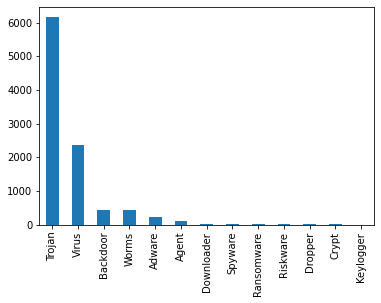

In [7]:
df['class'].value_counts().plot(kind='bar')

## Preprocesamiento

In [8]:
# Se eliminan las familias poco significativas
df = df.drop(df.index[df['class'] == "Downloader"])
df = df.drop(df.index[df['class'] == "Spyware"])
df = df.drop(df.index[df['class'] == "Ransoware"])
df = df.drop(df.index[df['class'] == "Riskware"])
df = df.drop(df.index[df['class'] == "Dropper"])
df = df.drop(df.index[df['class'] == "Crypt"])
df = df.drop(df.index[df['class'] == "Keylogger"])

In [9]:
df['class'].value_counts()

Trojan        6153
Virus         2367
Backdoor       447
Worms          441
Adware         222
Agent          102
Ransomware      10
Name: class, dtype: int64

<Axes: >

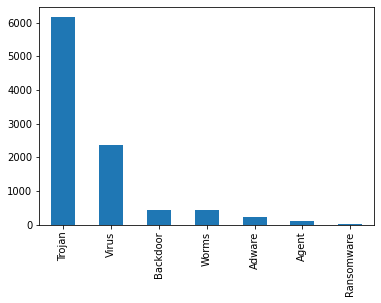

In [10]:
df['class'].value_counts().plot(kind='bar')

In [11]:
leas = LabelEncoder()
df['class'] = leas.fit_transform(df['class'])
df.file = leas.fit_transform(df.file)
df.api = leas.fit_transform(df.api)

In [12]:
df.sample(n=10)

,file,api,class
6795,4322,380,4
2141,1813,2499,5
5302,8445,461,4
8060,3351,1312,4
7343,1574,857,4
8665,229,516,2
2202,3869,2675,5
2644,3663,2378,5
2870,3505,650,5
9663,6257,2294,5


In [13]:
t = df['class']
df1 = df[['file', 'api']]

In [14]:
df1.sample(n=10)

,file,api
6208,3244,1372
8091,9274,2585
2524,5606,2703
7505,6834,709
8294,5305,1469
181,78,2658
8198,4202,1469
5357,8897,380
9184,468,1320
8109,4310,852


In [15]:
t.sample(n=10)

275     5
6909    4
4570    4
7752    4
2396    5
1619    4
9427    5
3098    5
6743    4
3906    4
Name: class, dtype: int64

In [16]:
ho = MinMaxScaler()
ho.fit(df1)
df1 = pd.DataFrame(ho.transform(df1))

In [17]:
df1.sample(n=10)

,0,1
7656,0.682989,0.465400
1328,0.971358,0.494912
2729,0.854840,0.740502
553,0.001437,0.405360
7307,0.626732,0.498304
6025,0.410122,0.956242
1758,0.085002,0.175034
3076,0.223591,0.573270
2119,0.429217,0.750339
8121,0.679807,0.445047


In [18]:
x_train, x_test, y_train, y_test = train_test_split(df1, t, train_size=0.7, test_size=0.3, random_state=5)

# Implementación de los Modelos

## Naive Bayes

In [19]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(df1, t, train_size=0.7, test_size=0.3, random_state=50)

In [20]:
naive = MultinomialNB()
naive.fit(x_train_bow, y_train_bow)

MultinomialNB()

In [21]:
naive_f = naive.predict(x_test_bow)
accuracy_score(y_test_bow, naive_f)

0.6301744782757441

In [22]:
confusion_matrix(y_test_bow, naive_f)
print(classification_report(y_test_bow, naive_f))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00       134
           3       0.00      0.00      0.00         3
           4       0.63      1.00      0.77      1842
           5       0.00      0.00      0.00       718
           6       0.00      0.00      0.00       129

    accuracy                           0.63      2923
   macro avg       0.09      0.14      0.11      2923
weighted avg       0.40      0.63      0.49      2923



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [23]:
ds = DecisionTreeClassifier()
ds = ds.fit(x_train, y_train)

In [24]:
prediction = ds.predict(x_test)
accuracy_score(y_test, prediction)

0.8843653780362641

In [25]:
confusion_matrix(y_test, prediction)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73        79
           1       0.35      0.38      0.37        29
           2       0.86      0.83      0.84       128
           3       0.00      0.00      0.00         2
           4       0.91      0.93      0.92      1842
           5       0.89      0.85      0.87       722
           6       0.68      0.73      0.70       121

    accuracy                           0.88      2923
   macro avg       0.64      0.63      0.63      2923
weighted avg       0.88      0.88      0.88      2923



# Conclusión

Dados los resultados, las predicciones del modelo de árbol de decisión fueron más precisas en general, pues no con todas las familias de malware tuvo bueno resultados. Esto se debe a que el dataset estaba muy desbalanceado, lo que provocó que estuviera muy bien entrenado para las familias de malware como Troyanos o Virus, mientras que con familias como Ransomware o Agent tuvo unas métricas muy malas, pues no se contó con datos suficientes.

Por otro lado, las predicciones del model de Naive Bayes fueron en general mucho más bajas que el modelo anterior, esto se debe a que generalmente este modelo es más adecuado para conjuntos de datos más pequeños o para características basadas en texto.

Y en cuanto al impacto de estos resultados al momento de clasificar malware, estos resultados pueden ser verdaderamente comprometedores para un usuario final, pues para abordar o tratar con cada uno de estos malware se necesita una solución o un enfoque diferente, por lo que la defensa contra una familia de malware podría no ser muy efectiva contra otra familia, lo que podría ocasionar defensas fallidas contra este tipo de ataques.